In [46]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [47]:
"""Intializes 297 points around 0,0 in x-y plane in data frame df"""
R_min = 25 # in kpc
M = 1 # in solar masses

R = []
T = []
for i in range(11):
    T.append(12+3*i)
    R.append((.2 + i*(.05))*R_min )
    
def rtpairs(r, n):

    df = pd.DataFrame(columns=['M','X', 'Y'])
    for i in range(len(r)):
        for j in range(n[i]):    
            df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
                            'Y': r[i] * np.sin(j*(2 * np.pi / n[i]))},
                           ignore_index=True)
    return df

df = rtpairs(R, T)
df['Z'] = np.zeros(297)
df['M'] = np.ones(297) * 1e-35



/tmp/ipykernel_26920/3942305952.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_26920/3942305952.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_26920/3942305952.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_26920/3942305952.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'X': r[i] * np.cos(j*(2 * np.pi / n[i])),
/tmp/ipykernel_26920/3942305952.py:16: FutureWarning: The frame.append m

In [48]:
def v_0(x, y, M):
    """Velocity Function in 2d
    r^2 = x^2 + y^2 from mass M
    """
    G = 4491.9 # kpc^3 / (M * T^2) where  solar masses and T = 10^8 years
    e_soft = .03  #softing parameter  
    r = np.sqrt(x**2 + y ** 2)
    v = np.sqrt( (G*M*r / (r ** 2 + e_soft**2 )  ) )
    theta = np.arccos(x/r)
    vy = v*np.cos(theta)
    theta = np.arcsin(y/r)
    vx = -v*np.sin(theta) 
    return [vx,vy]


df['V_x'] , df['V_y'] = v_0(df['X'],df['Y'],M) #velocity for ring points
df['V_z'] = np.zeros(297)

In [49]:
"""Rotates df by inclincation angles 15 for gal A and 60 for gal B of rings into df_ringA and df_ringB
    Both gal A and gal B are still centered at (0,0,0)
"""
def rot(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    a = 1 - np.cos(theta)
    rot_mat = np.array([[c, 0, s],
                       [0, a+c, 0],
                       [-s, 0, c]])
    return rot_mat


##Rotation for Galaxy A
rot_matA = rot(np.radians(-15))

df_ringA = pd.DataFrame(columns=['M','X', 'Y','Z','V_x','V_y','V_z'])
df_ringB = pd.DataFrame(columns=['M','X', 'Y','Z','V_x','V_y','V_z'])
df_ringA['M'] = np.ones(297) * 1e-35
df_ringB['M'] = np.ones(297) * 1e-35
df_ringA['X'], df_ringA['Y'], df_ringA['Z'] = rot_matA.dot([df['X'],df['Y'],df['Z']])
df_ringA['V_x'], df_ringA['V_y'], df_ringA['V_z'] = rot_matA.dot([df['V_x'],df['V_y'],df['V_z']])


## Rotation for galaxy B
rot_matB = rot(np.radians(-60))

df_ringB['X'], df_ringB['Y'], df_ringB['Z'] = rot_matB.dot([df['X'],df['Y'],df['Z']])
df_ringB['V_x'], df_ringB['V_y'], df_ringB['V_z'] = rot_matB.dot([df['V_x'],df['V_y'],df['V_z']])


In [50]:
"""Intializes Central Mass of Gal A and B in 2d pos and vel, 
    Path should look like theortical plot at the end
"""
df_mass = pd.DataFrame(columns=['M','X', 'Y','Z','V_x','V_y','V_z'])
df_mass = pd.DataFrame(columns=['M','X', 'Y','Z','V_x','V_y','V_z'])



vxA, vyA = [5.994597567810538, 8.991896351715804]
vxB, vyB = [-23.978390271242148, -8.991896351715802]
xA, yA = [-87.5, -40.0]
xB, yB = [-12.5, 40.0]
#vxB, vyB = [-10.550498093099588, -1.0789740925556321]
df_mass.loc[0] = [1,xA,yA,0,vxA,vyA,0]
df_mass.loc[1] = [1,xB,yB,0,vxB,vyB,0]

print(df_mass)

     M     X     Y    Z        V_x       V_y  V_z
0  1.0 -87.5 -40.0  0.0   5.994598  8.991896  0.0
1  1.0 -12.5  40.0  0.0 -23.978390 -8.991896  0.0


In [51]:
"""Shifts rings by their respective central masses position and velocity
"""
df_ringA['X'] = df_ringA['X'] + xA
df_ringA['Y'] = df_ringA['Y'] + yA
#print(df_ringA['V_y'])
df_ringA['V_x'] = df_ringA['V_x'] + vxA

df_ringA['V_y'] = df_ringA['V_y'] + vyA
#print(df_ringA['V_y'])
df_ringB['X'] = df_ringB['X'] + xB
df_ringB['Y'] = df_ringB['Y'] + yB
df_ringB['V_x'] = df_ringB['V_x'] + vxB
df_ringB['V_y'] = df_ringB['V_y'] + vyB
df_ringcomp = df_ringA.append(df_ringB, ignore_index=True) 


/tmp/ipykernel_26920/1520341720.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ringcomp = df_ringA.append(df_ringB, ignore_index=True)


## The rest of this notebook are plots to visual intialization

df_mass has gal center A in its first index and gal center B in its second <br>
df_ringA is rings on A <br>
df_ringB is rings on B <br>
df_ringcomp is ringB appended to ringA

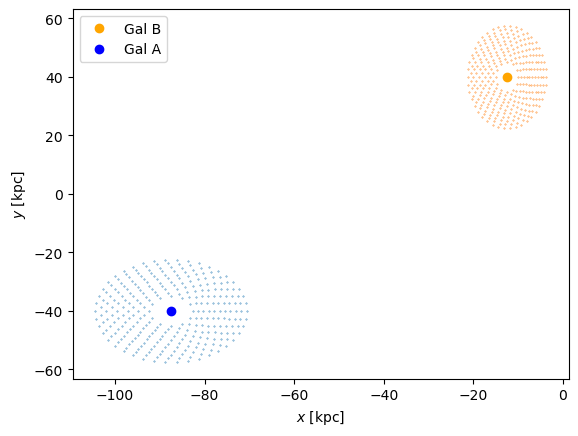

In [52]:
plt.scatter(df_ringA['X'],df_ringA['Y'],s=0.1)
plt.scatter(df_ringB['X'],df_ringB['Y'],s=0.1)
plt.plot(-12.5,40,'o',c='orange',label='Gal B')
plt.plot(-87.5,-40,'o',c='blue',label='Gal A')
plt.xlabel(r'$x$ [kpc]')
plt.ylabel(r'$y$ [kpc]')
plt.legend()

Text(0.5, 0, '$z$ [kpc]')

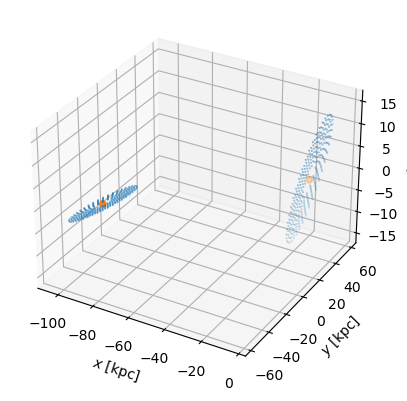

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ringcomp['X'], df_ringcomp['Y'], df_ringcomp['Z'], s=0.1)
ax.scatter(df_mass['X'],df_mass['Y'],df_mass['Z'],'o')
ax.set_xlabel(r'$x$ [kpc]')
ax.set_ylabel(r'$y$ [kpc]')
ax.set_zlabel(r'$z$ [kpc]')

In [54]:

mass = np.concatenate((df_mass['M'].to_numpy(),df_ringcomp['M'].to_numpy()))

X = np.concatenate((df_mass['X'].to_numpy(),df_ringcomp['X'].to_numpy()))
Y = np.concatenate((df_mass['Y'].to_numpy(),df_ringcomp['Y'].to_numpy()))
Z = np.concatenate((df_mass['Z'].to_numpy(),df_ringcomp['Z'].to_numpy()))
Vx = np.concatenate((df_mass['V_x'].to_numpy(),df_ringcomp['V_x'].to_numpy()))
Vy = np.concatenate((df_mass['V_y'].to_numpy(),df_ringcomp['V_y'].to_numpy()))
Vz = np.concatenate((df_mass['V_z'].to_numpy(),df_ringcomp['V_z'].to_numpy()))

stacked_data = np.stack([mass,X, Y, Z,Vx,Vy,Vz], axis=1)

print(stacked_data)

[[ 1.00000000e+00 -8.75000000e+01 -4.00000000e+01 ...  5.99459757e+00
   8.99189635e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.25000000e+01  4.00000000e+01 ... -2.39783903e+01
  -8.99189635e+00  0.00000000e+00]
 [ 1.00000000e-35 -8.26703709e+01 -4.00000000e+01 ...  5.99459757e+00
   3.89643447e+01  0.00000000e+00]
 ...
 [ 1.00000000e-35 -4.61652241e+00  3.24070346e+01 ... -2.05027185e+01
   5.44271722e+00  6.02004008e+00]
 [ 1.00000000e-35 -4.13873795e+00  3.48417844e+01 ... -2.16172226e+01
   6.31753850e+00  4.08966229e+00]
 [ 1.00000000e-35 -3.84773027e+00  3.73917603e+01 ... -2.27844714e+01
   6.85037231e+00  2.06792819e+00]]


In [55]:
# Write the data to a text file
with open("out.txt", "w") as f:
    for row in stacked_data:
        row_str = "\t".join(str(x) for x in row) + "\n"
        f.write(row_str)

convert to pandas

In [56]:
df_mass = stacked_data[0:2]
df_mass = pd.DataFrame(df_mass, columns = ['mass', 'x', 'y', 'z', 'v_x', 'v_y', 'v_z'])
df_comp = stacked_data[2:]
df_comp = pd.DataFrame(df_comp, columns = ['mass', 'x', 'y', 'z', 'v_x', 'v_y', 'v_z'])
df_comp.to_csv('comp.csv', index = False)
df_mass.to_csv('mass.csv', index=False)
